In [2]:
import os
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


dataset_path = "data"
image_size = (64*5, 48*5)

dataset_path = "data"

print('Our dataset = ')
print(os.listdir(dataset_path))

Our dataset = 
['Grupo_0', 'Grupo_1', '.DS_Store', 'Grupo_4', 'Grupo_3', 'Grupo_2', 'Grupo_5']


Step 1: Loading DataSet

In [3]:
def load_images_from_folder(folder_path, max_depth = 5):
    images = []
    labels = []
    names = []
    corruptedFiles = []
    image_extensions = ["bmp"]

    for root, dirs, files in os.walk(folder_path):
        current_depth = root[len(folder_path):].count(os.sep)

        if ('IriTech' in root) or ('Iritech' in root) or ('iriTech' in root) or ('iritech' in root):
            continue
        

        if current_depth <= max_depth:
            for file in files:
                if any(file.lower().endswith(ext) for ext in image_extensions):
                    img_path = os.path.join(root, file)
                    try:
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, image_size)
                            images.append(img)
                            labels.append(file[6]!='0')
                            names.append(file)
                    except:
                        corruptedFiles.append(img_path)

        else:
            del dirs[:]
    
    print(f"Following {len(corruptedFiles)} files are corrupt or encountered error: \n {corruptedFiles}")

    return np.array(images), np.array(labels), np.array(names)

images, labels, names = load_images_from_folder(dataset_path)
print(f"Read {len(images)} images from the data folder with shape {images.shape}")

Following 0 files are corrupt or encountered error: 
 []
Read 2820 images from the data folder with shape (2820, 240, 320)


(240, 320)


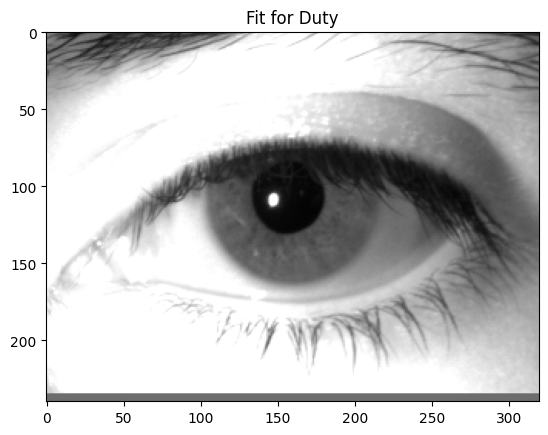

In [4]:
def showImg(index):
    plt.imshow(images[index], cmap='gray')
    plt.title('Alcoholic' if labels[index] else 'Fit for Duty')
    print(images[index].shape)

showImg(900)

Step 2: Split images and labels into 80-20 random train test split and train cnn

In [5]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.7, random_state=28)

labels_train_cnn = to_categorical(labels_train, num_classes=2)
labels_test_cnn = to_categorical(labels_test, num_classes=2)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size+(1,)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(images_train, labels_train_cnn, epochs=10, batch_size=32)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - accuracy: 0.6511 - loss: 932.2394
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 406ms/step - accuracy: 0.8206 - loss: 0.5361
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.8193 - loss: 0.6753
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.8093 - loss: 0.4583
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.8018 - loss: 0.4326
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 520ms/step - accuracy: 0.8185 - loss: 0.4033
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 474ms/step - accuracy: 0.8266 - loss: 0.3733
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 447ms/step - accuracy: 0.8128 - loss: 0.3700
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 425ms/step - accuracy: 0.8443 - loss: 0.3392
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 423ms/step - accuracy: 0.8753 - loss: 0.3065


In [6]:
#Testing model
cnn_loss, cnn_accuracy = cnn_model.evaluate(images_test, labels_test_cnn)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

predictions = cnn_model.predict(images_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels_test_cnn, axis=1)

report = classification_report(true_classes, predicted_classes, target_names=['Fit for Duty', 'Alcoholic'])
print(report)

accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Overall Accuracy: {accuracy * 100:.2f}%')

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.7543 - loss: 0.7782
CNN Test Accuracy: 75.89%
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step
              precision    recall  f1-score   support

Fit for Duty       0.27      0.09      0.13       416
   Alcoholic       0.79      0.94      0.86      1558

    accuracy                           0.76      1974
   macro avg       0.53      0.51      0.50      1974
weighted avg       0.68      0.76      0.71      1974

Overall Accuracy: 75.89%


Demonstration

In [7]:
totalTest = 0
correctTest = 0

(1, 240, 320)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Text(0.5, 1.0, 'Name: E_5_5_2_L_M_N_N_1995_9_2017.bmp\n\nPrediction: Alcoholic\nActual: Alcoholic\n\nAccuracy: 1.0')

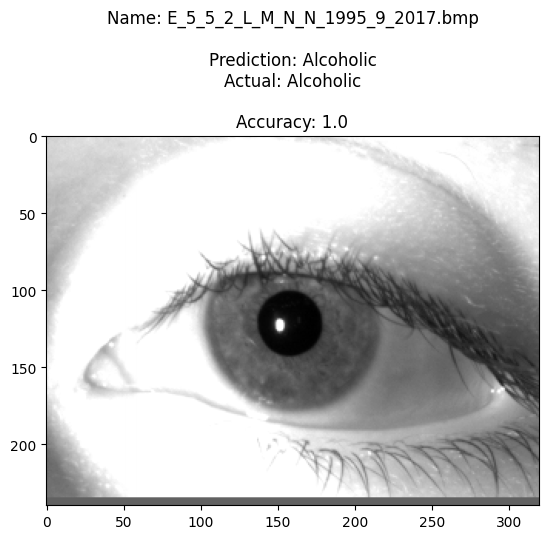

In [8]:
# testImagePath = 'data/Grupo_5/E_5_7/Iritech/E_5_7_0/E_5_7_0_L_F_N_N_1994_0_2017.bmp'
# testImg = cv2.imread(testImagePath, cv2.IMREAD_GRAYSCALE)

r_in = random.randint(0, len(images) - 1)


testImg = images[r_in]
testLabel = labels[r_in]
testImg = cv2.resize(testImg, image_size)

plt.imshow(testImg, cmap='gray')

testImg = np.expand_dims(testImg, axis=0)

print(testImg.shape)

prediction = cnn_model.predict(testImg)
prediction = np.argmax(prediction[0])

totalTest +=1
correctTest += prediction==testLabel

prediction = 'Alcoholic' if prediction else 'Fit for duty'
testLabel = 'Alcoholic' if testLabel else 'Fit for duty'
plt.title(f'Name: {names[r_in]}\n\nPrediction: {prediction}\nActual: {testLabel}\n\nAccuracy: {correctTest/totalTest}')